``` text 
Team  16
يوسف حسن محمدعلام
وجدان مصطفى محمد حسين 
ندا عماد محمود 
 ايمان  نصر السيد يحي 
مصطفي خالد
محمود رمضان عبدالوهاب 
سهيله عزت يوسف
شيماء حميدو ابوسريع
دنيا عبدالعزيز
بتول محمد

```

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np 

In [1]:
num_of_vertices = 4 # The number of vertices
INF = 999

def print_solution(distance):
    for i in range(num_of_vertices):
        for j in range(num_of_vertices):
            if(distance[i][j] == INF):
                print("INF", end=" ")
            else:
                print(distance[i][j], end="  ")
        print(" ")

In [9]:

def floyd_warshall(G):
    distance = list(map(lambda i: list(map(lambda j: j, i)), G))
    # that will store the shortest paths between all pairs of vertices.
    
    # Adding vertices individually
    for k in range(num_of_vertices):
        for i in range(num_of_vertices):
            for j in range(num_of_vertices):
                distance[i][j] = min(distance[i][j], distance[i][k] + distance[k][j])
    print_solution(distance)

### When input is Matrix

In [10]:
A0 = [
    [0, 5, -3, INF ],
    [9, 0, INF, 3  ],
    [4, 5, 0, INF  ],
    [INF, INF, 1, 0] ]

floyd_warshall(A0)


0  2  -3  5   
8  0  4  3   
4  5  0  8   
5  6  1  0   


### When the input is Graph 

In [5]:
def get_Adjacency_Matrix(G):
    nodes = list(G.nodes())
    A0 = np.zeros((len(nodes), len(nodes)))
    for i, node1 in enumerate(nodes):
        for j, node2 in enumerate(nodes):
            if G.has_edge(node1, node2):
                A0[i][j] = G[node1][node2]['weight']
            else:
                A0[i][j] = np.inf if i != j else 0
                
    return A0

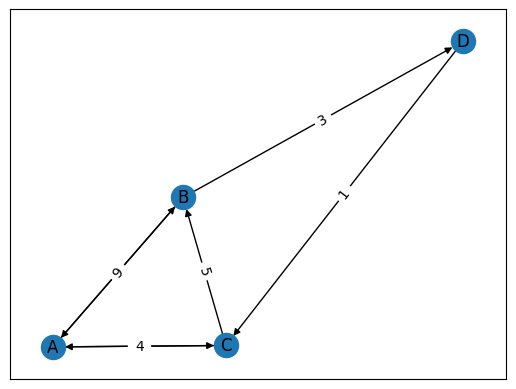

In [6]:
G = nx.DiGraph()
G.add_edge("A", "B", weight=5)
G.add_edge("A", "C", weight=-3)
G.add_edge("B", "A", weight=9)
G.add_edge("B", "D", weight=3)
G.add_edge("C", "A", weight=4)
G.add_edge("C", "B", weight=5)
G.add_edge("D", "C", weight=1)


pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, arrows=True)
edge_weights = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_weights)
plt.show()

In [62]:
Adjacency_Matrix = get_Adjacency_Matrix(G)
print(Adjacency_Matrix)

[[ 0.  5. -3. inf]
 [ 9.  0. inf  3.]
 [ 4.  5.  0. inf]
 [inf inf  1.  0.]]


In [63]:
floyd_warshall(Adjacency_Matrix)

0.0  2.0  -3.0  5.0   
8.0  0.0  4.0  3.0   
4.0  5.0  0.0  8.0   
5.0  6.0  1.0  0.0   


# Using Built in function 

In [6]:
nx.floyd_warshall_numpy(G)

array([[ 0.,  2., -3.,  5.],
       [ 8.,  0.,  4.,  3.],
       [ 4.,  5.,  0.,  8.],
       [ 5.,  6.,  1.,  0.]])

# Drawing the Graph

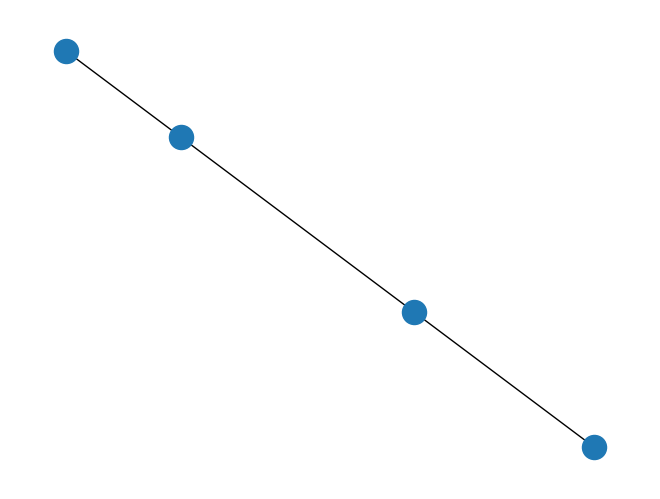

In [64]:

G2 = nx.Graph()
G2.add_weighted_edges_from([('A', 'B', 10), ('B', 'C',2), ('C', 'D',3)])
edge_weights = nx.get_edge_attributes(G2, "weight")
pos = nx.spring_layout(G2)
nx.draw(G2 ,pos = pos )
plt.show()

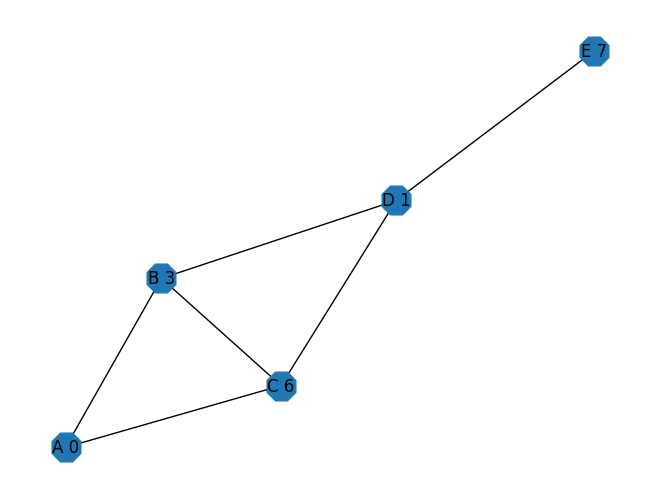

In [65]:


labels = {'A': 'A 0', 'B': 'B 3', 'C': 'C 6', 'D': 'D 1' , 'E':'E 7'}
 
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'D'),('D','E')])

nx.draw(G, node_size=500 , with_labels =True ,node_shape='8',labels=labels )
'''
arrows=True,
arrowstyle='CurveA'
, node_color='blue', edge_color='black' 
'''
plt.show()

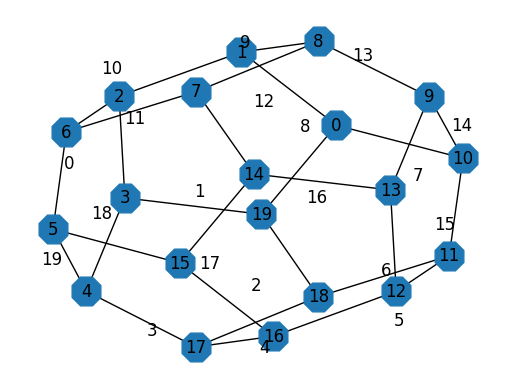

In [57]:
G = nx.dodecahedral_graph()
labels = nx.draw_networkx_labels(G, pos=nx.spring_layout(G))
nx.draw(G, node_size=500 , with_labels =True ,node_shape='8' )

plt.show()